In [ ]:
import sys
!{sys.executable} -m pip install mycolorpy

In [1]:
from models import Entity, Environment
from vizuals import plot_env_history

import numpy as np
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
from random import uniform

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

TRAIN_SIZE = 100
VAL_SIZE = 150
TEST_SIZE = 400

In [2]:
# # Create train loader
# x_arr = torch.rand(TRAIN_SIZE, 2)
# x_arr[:int(TRAIN_SIZE/2), 0] -= 1
# x_arr[:int(TRAIN_SIZE/2), 1] += 1

# l1 = torch.zeros(int(TRAIN_SIZE/2)).unsqueeze(1)
# l2 = torch.ones(TRAIN_SIZE - int(TRAIN_SIZE/2)).unsqueeze(1)
# l_label = torch.cat((l1, l2))
# dataset = Data.TensorDataset(x_arr, l_label)


# train_loader = Data.DataLoader(
# 	dataset=dataset,
#     batch_size=10, # Divided into batches
#     shuffle=True  # Whether to disrupt the data, the default is False
# )


# # Create val loader
# x_val = torch.rand(VAL_SIZE, 2)
# x_val[:int(VAL_SIZE/2), 0] -= 1
# x_val[:int(VAL_SIZE/2), 1] += 1

# l1 = torch.zeros(int(VAL_SIZE/2)).unsqueeze(1)
# l2 = torch.ones(VAL_SIZE - int(VAL_SIZE/2)).unsqueeze(1)
# l_label = torch.cat((l1, l2))
# dataset = Data.TensorDataset(x_val, l_label)

# val_loader = Data.DataLoader(
# 	dataset=dataset,
#     batch_size=10, # Divided into batches
#     shuffle=True  # Whether to disrupt the data, the default is False
# )

# # Plot
# plt.scatter(x_arr[:, 0], x_arr[:, 1], label="Train")
# plt.scatter(x_val[:, 0], x_val[:, 1], label="Val")
# plt.legend()
# plt.show()

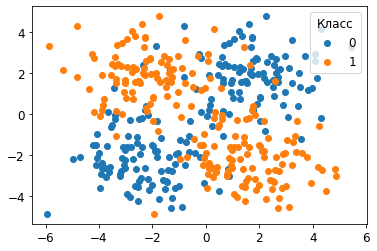

In [3]:
MEAN = 2

x_1 = torch.normal(-MEAN, 1.4, (TRAIN_SIZE, 2))
x_2 = torch.normal(MEAN, 1.4, (TRAIN_SIZE, 2))

x_1 = torch.cat((x_1, x_2))

x_2 = x_1.clone().detach()
x_2[:TRAIN_SIZE, 0] += 2 * MEAN
x_2[TRAIN_SIZE:, 0] -= 2 * MEAN

x_train = torch.cat((x_1, x_2))

plt.scatter(x_1[:, 0], x_1[:, 1], label="0")
plt.scatter(x_2[:, 0], x_2[:, 1], label="1")
plt.legend(title="Класс", loc=1)
plt.show()

In [4]:
l_1 = torch.zeros(TRAIN_SIZE * 2).unsqueeze(1)
l_2 = torch.ones(TRAIN_SIZE * 2).unsqueeze(1)
l_train = torch.cat((l_1, l_2))
        
dataset = Data.TensorDataset(x_train, l_train)

train_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=10, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

x_val = (torch.rand(VAL_SIZE, 2) - 0.5) * 6
l_val = []
for point in x_val:
    x, y = point
    zero = uniform(-0.5, 0.5)
    if ((x > zero) and (y < zero)) or ((x < zero) and (y > zero)):
        l_val.append(1)
    else:
        l_val.append(0)

l_val = torch.Tensor(l_val).unsqueeze(1)
dataset = Data.TensorDataset(x_val, l_val)
val_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=10, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

x_test = (torch.rand(TEST_SIZE, 2) - 0.5) * 6
l_test = []
for point in x_test:
    x, y = point
    if ((x > 0) and (y < 0)) or ((x < 0) and (y > 0)):
        l_test.append(1)
    else:
        l_test.append(0)

l_test = torch.Tensor(l_test).unsqueeze(1)
dataset = Data.TensorDataset(x_test, l_test)
test_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=10, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

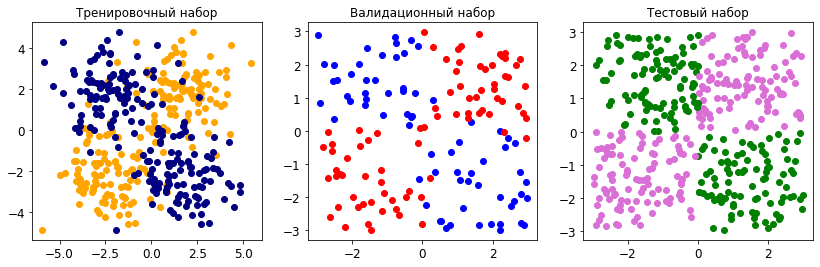

In [6]:
fig, axes = plt.subplots(1, 3)

fig.set_size_inches(14, 4)

ax1, ax2, ax3 = axes

ax1.set_title("Тренировочный набор")
# ax1.set_xlabel("Шаг эволюции")
# ax1.set_ylabel("Ошибка особи")
# ax1.set_ylim((0, 0.2))
for point, label in zip(x_train, l_train):
    if label[0] < 0.5:
        ax1.scatter(point[0], point[1], color="orange", label="0")
    else:
        ax1.scatter(point[0], point[1], color="navy", label="1")
# ax1.set_xticks(list(range(1, len(env.history)+1, 5)))
# ax1.legend(title="Класс")

ax2.set_title("Валидационный набор")
# ax2.set_xlabel("Шаг эволюции")
# ax2.set_ylabel("Ошибка особи")
# ax2.set_ylim((0, 0.2))
for point, label in zip(x_val, l_val):
    if label[0] < 0.5:
        ax2.scatter(point[0], point[1], color="red", label="0")
    else:
        ax2.scatter(point[0], point[1], color="blue", label="1")
# ax2.set_xticks(list(range(1, len(env.history)+1, 5)))
# ax2.legend(title="Класс")


ax3.set_title("Тестовый набор")
for point, label in zip(x_test, l_test):
    if label[0] < 0.5:
        ax3.scatter(point[0], point[1], color="orchid", label="0")
    else:
        ax3.scatter(point[0], point[1], color="green", label="1")

# ax3.legend(title="Класс")
# plt.title("Распределение данных")
plt.savefig("xor_datasets.png", edgecolor='black', dpi=300, facecolor='white')
plt.show()

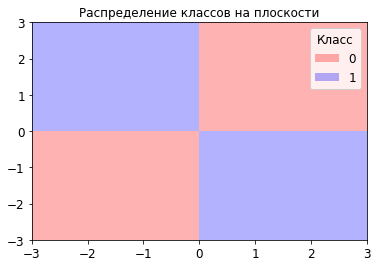

In [7]:
fig, ax = plt.subplots()
rect = patches.Rectangle((0, 0), 3, 3, linewidth=1, edgecolor='none', facecolor='red', fill=True, alpha=0.3)
ax.add_patch(rect)
rect = patches.Rectangle((-3, -3), 3, 3, linewidth=1, edgecolor='none', facecolor='red', fill=True, alpha=0.3, label="0")
ax.add_patch(rect)

rect = patches.Rectangle((0, -3), 3, 3, linewidth=1, edgecolor='none', facecolor='blue', fill=True, alpha=0.3)
ax.add_patch(rect)

rect = patches.Rectangle((-3, 0), 3, 3, linewidth=1, edgecolor='none', facecolor='blue', fill=True, alpha=0.3, label="1")
ax.add_patch(rect)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

ax.set_title("Распределение классов на плоскости")
ax.legend(title="Класс")

plt.savefig("true_classes.png", dpi=300)
plt.show()

In [8]:
env = Environment(20, train_loader, train_epochs=25, validation_loader=val_loader, in_shape=2)

cpu


In [9]:
start_time = time.time()
env.train_epoch()
print(f"Train ended in {int(time.time() - start_time)} s")
env.validate_entities(val_loader, True)
test_history = []
test_history.append(env.validate_entities(test_loader, False))

Train ended in 11 s


In [12]:
for i in range(10):
    start_time = time.time()
    env.evo_step()
    env.train_epoch()
    env.validate_entities(val_loader, True)
    test_history.append(env.validate_entities(test_loader, False))
    print(f"Evo epoch {i+1} ended in {int(time.time() - start_time)} s")

0.005738673318798343 8
0.00655316449701786 14
0.00784058853983879 10
0.007846674229949713 7
0.008607794518272082 18
0.008710053637623786 16
0.009497491816679636 11
0.010207101379831631 17
0.010208518703778586 5
0.010994070544838905 13
0.012558120042085646 4
0.01590169042348862 12
0.023179991245269777 19
0.024487499396006265 9
0.024842000007629393 1
0.025008867581685384 6
0.025054199298222862 3
Evo epoch 1 ended in 32 s
0.005634710229933262 14
0.0058478489642341935 8
0.005984865662952264 14
0.0070296425124009455 8
0.007250417607525985 10
0.0076956640432278315 10
0.00991753173371156 16
0.010283208365241686 17
0.01155370573202769 7
0.012473396137356759 18
0.013221427152554194 13
0.013956661944588025 5
0.014024428973595302 11
0.014238775024811426 4
0.018864458401997884 19
0.020878461201985676 12
0.024846922059853872 1
Evo epoch 2 ended in 34 s
0.005629867669194937 14
0.006320074126124382 8
0.0066139792278409005 10
0.00669827900826931 8
0.006828163700799148 14
0.0069365407402316726 14
0.006

C:\Users\mrsca\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\init.py:403: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Evo epoch 9 ended in 44 s
0.004950632583349943 14
0.005352309222022692 14
0.005439197104424238 14
0.00579863910873731 14
0.005933624779184659 14
0.006022774837911129 14
0.006314916977037986 14
0.00636809935172399 14
0.006374601405113936 14
0.006584916325906913 14
0.006751166178534428 14
0.006889112405478954 10
0.006966552225251993 14
0.0069872985283533735 14
0.007312262877821922 8
0.007385336924344302 14
0.008794810126225154 10
Evo epoch 10 ended in 45 s


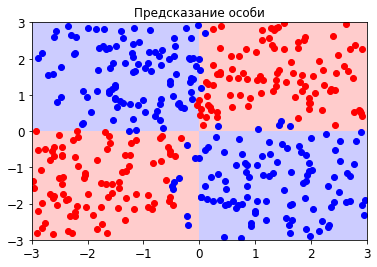

In [13]:
fig, ax = plt.subplots()
rect = patches.Rectangle((0, 0), 3, 3, linewidth=1, edgecolor='none', facecolor='red', fill=True, alpha=0.2)
ax.add_patch(rect)
rect = patches.Rectangle((-3, -3), 3, 3, linewidth=1, edgecolor='none', facecolor='red', fill=True, alpha=0.2, label="0")
ax.add_patch(rect)

rect = patches.Rectangle((0, -3), 3, 3, linewidth=1, edgecolor='none', facecolor='blue', fill=True, alpha=0.2)
ax.add_patch(rect)

rect = patches.Rectangle((-3, 0), 3, 3, linewidth=1, edgecolor='none', facecolor='blue', fill=True, alpha=0.2, label="1")
ax.add_patch(rect)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
y_p = env.entities[5].predict(x_test).squeeze(1)
for point, prob in zip(x_test, y_p):
    if prob > 0.5:
        ax.scatter(point[0], point[1], color="blue")
    else:
        ax.scatter(point[0], point[1], color="red")
ax.set_title("Предсказание особи")
# ax.legend(title="Класс", loc=1)
plt.savefig("Predict_0_11.png", dpi=300)
plt.show()

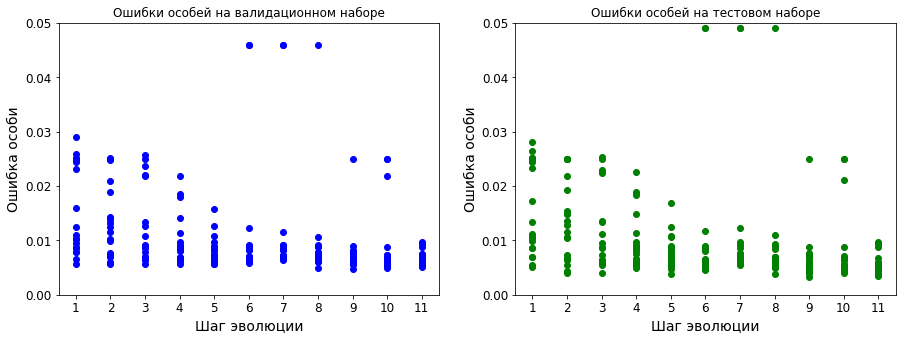

In [14]:
fig, axes = plt.subplots(1, 2)

fig.set_size_inches(15, 5)

ax1, ax2 = axes

ax1.set_title("Ошибки особей на валидационном наборе")
ax1.set_xlabel("Шаг эволюции")
ax1.set_ylabel("Ошибка особи")
ax1.set_ylim((0, 0.05))
for i, arr in enumerate(env.history):
    for loss in arr:
        ax1.scatter(i+1, loss, color="blue")
ax1.set_xticks(list(range(1, len(env.history)+1)))

ax2.set_title("Ошибки особей на тестовом наборе")
ax2.set_xlabel("Шаг эволюции")
ax2.set_ylabel("Ошибка особи")
ax2.set_ylim((0, 0.05))
for i, arr in enumerate(test_history):
    for loss in arr:
        ax2.scatter(i+1, loss, color="green")
ax2.set_xticks(list(range(1, len(env.history)+1)))
plt.savefig("loss(evo_epoch)_10_xor.png", edgecolor='black', dpi=300, facecolor='white')
plt.show()

In [12]:
print(env.entities[5].gens)

{'layers': [{'type': 'Linear', 'in': 2, 'out': 21}, {'type': 'ReLU', 'in': 21, 'out': 21}, {'type': 'Linear', 'in': 21, 'out': 11}, {'type': 'Sigmoid', 'in': 11, 'out': 11}, {'type': 'Linear', 'in': 11, 'out': 1}, {'type': 'Sigmoid', 'in': 1, 'out': 1}], 'criterion': 'MSELoss', 'optimizer': {'name': 'Adam', 'lr': 0.009145442316715022}}


In [15]:
for i in range(20):
    start_time = time.time()
    env.evo_step()
    env.train_epoch()
    env.validate_entities(val_loader, True)
    test_history.append(env.validate_entities(test_loader, False))
    print(f"Evo epoch {i+1} ended in {int(time.time() - start_time)} s")

0.005154969583575924 14
0.005228746545811494 14
0.005630234107375145 14
0.005868733047197263 14
0.00589083823064963 14
0.005964916100104649 14
0.006266871560364961 14
0.006310604419559241 8
0.006348985626051823 14
0.006350021585822105 14
0.006590198234965404 14
0.006652564605077108 14
0.006818293761461973 14
0.006835988337794939 14
0.006886461197088162 10
0.007514693252742291 14
0.0075685655201474826 14
Evo epoch 1 ended in 37 s
0.0050286413046220935 14
0.005350309511025746 14
0.005441750219712655 14
0.005455871478964884 14
0.0055931937197844185 14
0.005599959039439758 14
0.005664551661660274 14
0.00575826653589805 10
0.005973825268447399 14
0.006073384576787551 14
0.006175821820894877 14
0.00626004450644056 14
0.0063703331723809235 14
0.006417943506191175 14
0.006536925838639339 14
0.006625947045783202 14
0.006654797792434693 14
Evo epoch 2 ended in 37 s
0.005295235148320596 14
0.005868470227966706 14
0.005914112335691849 14
0.006146997610727946 14
0.006227463434139888 14
0.0062766990

Evo epoch 19 ended in 42 s
0.0047427226044237615 14
0.005204338704546293 14
0.005278524861981471 14
0.005542554771527648 14
0.005627340665087103 14
0.005667271912097931 14
0.005756972121695678 14
0.005766368362431725 14
0.005912529590229193 14
0.0059858463518321515 14
0.00604765343790253 14
0.00638943084826072 14
0.006438277140259743 14
0.006457345355302095 14
0.006467301584780216 14
0.006667559978862604 14
0.006833152199784915 14
Evo epoch 20 ended in 42 s


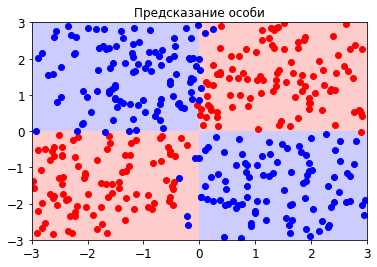

In [16]:
fig, ax = plt.subplots()
rect = patches.Rectangle((0, 0), 3, 3, linewidth=1, edgecolor='none', facecolor='red', fill=True, alpha=0.2)
ax.add_patch(rect)
rect = patches.Rectangle((-3, -3), 3, 3, linewidth=1, edgecolor='none', facecolor='red', fill=True, alpha=0.2, label="0")
ax.add_patch(rect)

rect = patches.Rectangle((0, -3), 3, 3, linewidth=1, edgecolor='none', facecolor='blue', fill=True, alpha=0.2)
ax.add_patch(rect)

rect = patches.Rectangle((-3, 0), 3, 3, linewidth=1, edgecolor='none', facecolor='blue', fill=True, alpha=0.2, label="1")
ax.add_patch(rect)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
y_p = env.entities[5].predict(x_test).squeeze(1)
for point, prob in zip(x_test, y_p):
    if prob > 0.5:
        ax.scatter(point[0], point[1], color="blue")
    else:
        ax.scatter(point[0], point[1], color="red")
ax.set_title("Предсказание особи")
# ax.legend(title="Класс", loc=1)
plt.savefig("Predict_0_31.png", dpi=300)
plt.show()

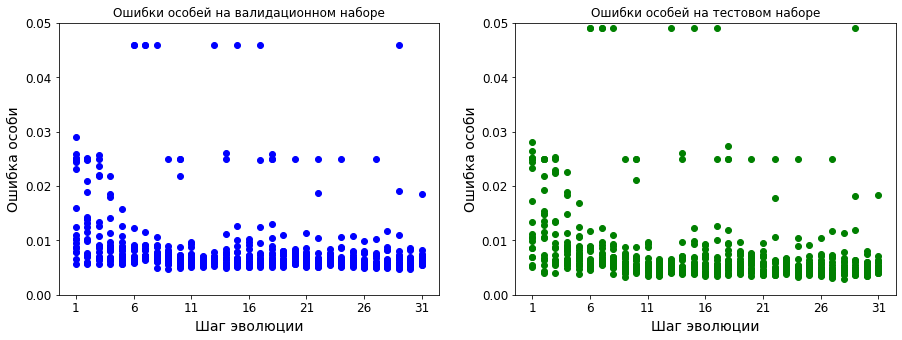

In [17]:
fig, axes = plt.subplots(1, 2)

fig.set_size_inches(15, 5)

ax1, ax2 = axes

ax1.set_title("Ошибки особей на валидационном наборе")
ax1.set_xlabel("Шаг эволюции")
ax1.set_ylabel("Ошибка особи")
ax1.set_ylim((0, 0.05))
for i, arr in enumerate(env.history):
    for loss in arr:
        ax1.scatter(i+1, loss, color="blue")
ax1.set_xticks(list(range(1, len(env.history)+1, 5)))

ax2.set_title("Ошибки особей на тестовом наборе")
ax2.set_xlabel("Шаг эволюции")
ax2.set_ylabel("Ошибка особи")
ax2.set_ylim((0, 0.05))
for i, arr in enumerate(test_history):
    for loss in arr:
        ax2.scatter(i+1, loss, color="green")
ax2.set_xticks(list(range(1, len(env.history)+1, 5)))
plt.savefig("loss(evo_epoch)_31_xor.png", edgecolor='black', dpi=300, facecolor='white')
plt.show()